<a href="https://colab.research.google.com/github/ghazzoul12/University-project/blob/main/GBM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing packages:


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd

Defining the function to be able to calculate the mean average percentage error:

In [ ]:
# Define function for MAPE calculation
def mean_absolute_percentage_error(y_true, y_pred):
    """
    Calculate Mean Absolute Percentage Error (MAPE).

    Parameters:
        y_true (array-like): Array of true values.
        y_pred (array-like): Array of predicted values.

    Returns:
        float: Mean Absolute Percentage Error.
    """
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

Downloading the data from yahoo finance. We chose the apple stock from 2011 till 2012 ( of course we can make the time line bigger than one year, but in our simulations we chose 1 year)

In [ ]:
stock_data = yf.download('AAPL', start='2011-01-01', end='2012-01-01')
returns = stock_data['Adj Close'].pct_change().dropna()
mu = returns.mean()
sigma = returns.std()

#drift coefficient
mu= mu
#number of steps
n= 100
#time in days
T= 250
#number of simulations
M= 100
#initial stock price
S0 = stock_data['Adj Close'].iloc[-1]
#volatility
sigma = sigma


[*********************100%%**********************]  1 of 1 completed


 S0: the last (most recent) value of the adjusted closing price of the Apple stock.

In [ ]:
S0

12.245457649230957

In [ ]:
#calculate actual time step
dt=T/n

# simulation using numpy arrays

St=np.exp((mu-sigma ** 2/2)*dt +sigma*np.random.normal(0,np.sqrt(dt),size=(M,n)).T)

#include array of 1s

St= np.vstack([np.ones(M),St])

#multiply through by S0 and return the cumulative product of elements along a given simulation path (axis=0)

St= S0 * St.cumprod(axis=0)

in the function np.random.normal, we are randomly sampling in the normal distribution with the sqrt of change of time. size is the number of simulation by the number of time steps we want to take.And then we're taking the transpose ,we're getting simulation for eachtime steps.

In [ ]:
St[1]

array([12.29693363, 12.29677484, 12.89460799, 12.55821549, 12.45885707,
       12.90692202, 11.79938845, 12.34576382, 12.5217029 , 12.56634289,
       12.61102716, 12.81036982, 12.12916702, 12.60472734, 11.92005243,
       12.48814489, 12.2133458 , 12.20643093, 12.44053571, 12.94350654,
       12.33762167, 12.16935549, 12.51923052, 12.41365063, 12.40766103,
       12.19219441, 12.48375678, 12.16838317, 11.8645604 , 12.00921838,
       12.48707685, 11.81840958, 11.94260324, 11.93510203, 12.69134337,
       12.20365007, 12.62425995, 11.98851156, 11.95058114, 11.72750033,
       12.63028423, 12.1910042 , 12.15768709, 12.18422891, 12.44552502,
       12.44043561, 12.14532636, 12.47693122, 12.22301091, 12.38714685,
       12.57842153, 12.88854383, 11.89563764, 12.49540755, 11.81884677,
       12.08941036, 12.05577591, 12.49174588, 12.05699083, 11.86392359,
       11.94142317, 12.05754309, 12.56518163, 12.08392272, 12.56265471,
       12.79386402, 12.27393645, 11.57424758, 11.77571547, 12.19

In [ ]:

len(St)

101

In [ ]:
#define time interval

time= np.linspace(1,T,n+1)

#Require numpy array that is the same shape as St

tt=np.full(shape=(M,n+1),fill_value= time).T

In [ ]:
# Calculate MAPE
historical_prices = stock_data['Adj Close'].values[-(n + 1):]
mape = mean_absolute_percentage_error(historical_prices[:-1], St[-1])
print("MAPE:", mape)

MAPE: 33.22459689172763


MAPE is the mean absolute percentage error, which is a relative measure that essentially scales MAD to be in percentage units instead of the variable’s units. Mean absolute percentage error is a relative error measure that uses absolute values to keep the positive and negative errors from canceling one another out and uses relative errors to enable you to compare forecast accuracy between time-series models.

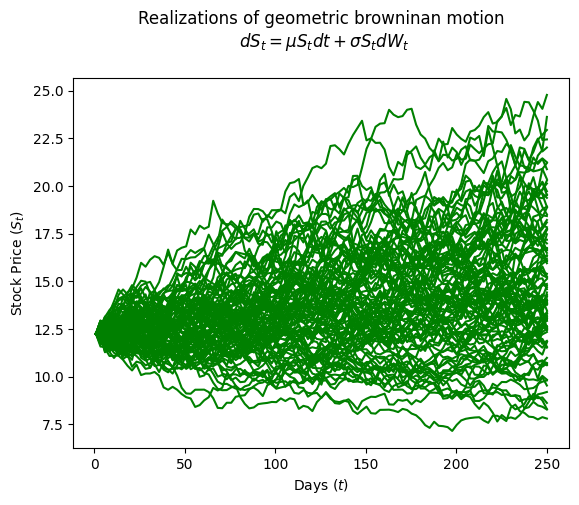

In [ ]:
plt.plot(tt,St,color='green')
plt.xlabel("Days $(t)$")
plt.ylabel("Stock Price $(S_t)$")
plt.title("Realizations of geometric browninan motion\n $dS_t= \mu S_t dt +\sigma S_t dW_t$\n")
plt.show()

To assess the accuracy of the geometric brownian motion we've simulated we decided to compare the actual stock prices with the forecasted ones.

In [ ]:
#Downloading the stock price from 2010 till recent years
apple_stock = pd.read_csv('/AAPL.csv', index_col='Date', parse_dates=True)

# filter the data so we can only compare the next forcasted 250-252 days with the actual price of the stock
filtered_data = apple_stock['2012-01-01':'2013-01-01']

# Remove columns "Open", "High", "Low", "Close", "Volume"
filtered_data = filtered_data.drop(columns=['Open', 'High', 'Low', 'Close', 'Volume'])

# Add a new column with row enumeration ( to be able to have the same axis of 250-252ish)
filtered_data['Index'] = range(1, len(filtered_data) + 1)

# Reset index to make 'Date' a column
filtered_data.reset_index(inplace=True)


filtered_data = filtered_data[['Index', 'Adj Close', 'Date']]

print(filtered_data)


     Index  Adj Close       Date
0        1  12.519279 2012-01-03
1        2  12.586557 2012-01-04
2        3  12.726295 2012-01-05
3        4  12.859333 2012-01-06
4        5  12.838936 2012-01-09
..     ...        ...        ...
245    246  15.976430 2012-12-24
246    247  15.756212 2012-12-26
247    248  15.819472 2012-12-27
248    249  15.651472 2012-12-28
249    250  16.344990 2012-12-31

[250 rows x 3 columns]


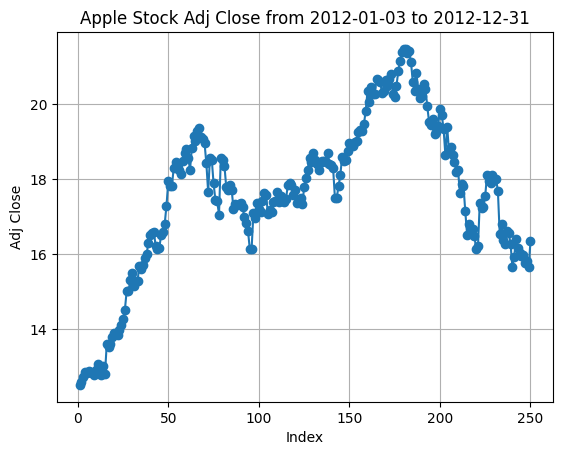

In [ ]:

# Plotting only the adj close with the axis
plt.plot(filtered_data['Index'], filtered_data['Adj Close'], marker='o', linestyle='-')

# Adding labels and title
plt.xlabel('Index')
plt.ylabel('Adj Close')
plt.title('Apple Stock Adj Close from 2012-01-03 to 2012-12-31')

# Display the plot
plt.grid(True)
plt.show()


Now finally, we can compare the the actual price of the stock with the GBM, and visualize it on the plot

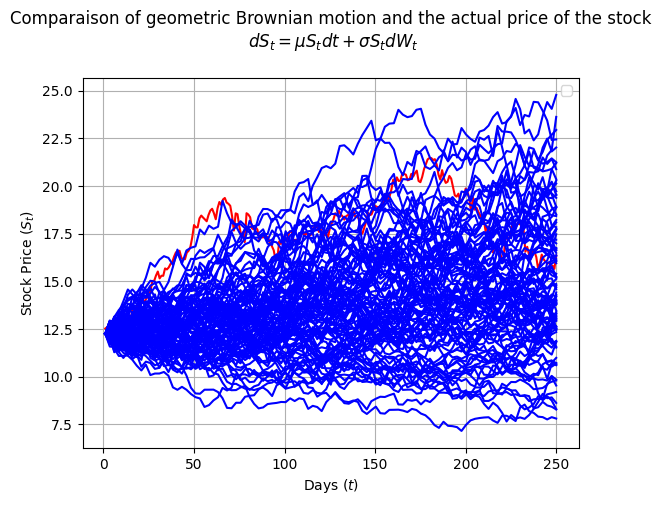

In [ ]:

# Plotting
plt.plot(filtered_data['Index'], filtered_data['Adj Close'], color='red')
plt.plot(tt, St, color='blue')

# Adding labels and title
plt.xlabel('Days $(t)$')
plt.ylabel('Stock Price $(S_t)$')
plt.title('Comparaison of geometric Brownian motion and the actual price of the stock\n $dS_t= \mu S_t dt +\sigma S_t dW_t$\n ')
plt.legend()

# Display the plot
plt.grid(True)
plt.show()


In [ ]:
# Calculate MAPE
filtered_data = filtered_data['Adj Close'].values[-(n + 1):]
single_path_simulation = St[:, 0]
mape = mean_absolute_percentage_error(filtered_data[:-1], single_path_simulation)
print("MAPE:", mape)
# Calculate MAPE


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices